# Predicting the House Price Index using Machine Learning Model

## Using LSTM Model 

In [1]:
#importing various libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [2]:
#importing the dataset
df = pd.read_csv(r'C:/Users/hp/dissertation/Datasets/Indices-2022-05_ONS.csv')
df.head()

,Date,Region_Name,Area_Code,Index
0,1968-04-01,England,E92000001,1.680067
1,1968-04-01,Scotland,S92000003,2.108087
2,1968-04-01,Northern Ireland,N92000001,3.300420
3,1968-04-01,Wales,W92000004,2.119327
4,1968-04-01,West Midlands Region,E12000005,2.097808


In [3]:
# Since there are different regions , thus selecting region as UK
df = df[df.Region_Name=='United Kingdom']
df.head()

,Date,Region_Name,Area_Code,Index
9,1968-04-01,United Kingdom,K02000001,1.885299
19,1968-05-01,United Kingdom,K02000001,1.885299
29,1968-06-01,United Kingdom,K02000001,1.885299
39,1968-07-01,United Kingdom,K02000001,1.949207
49,1968-08-01,United Kingdom,K02000001,1.949207


In [4]:
#Dropping the area code column and region name as it is not required
df.drop(['Area_Code','Region_Name'],axis=1,inplace=True)
df.head()

,Date,Index
9,1968-04-01,1.885299
19,1968-05-01,1.885299
29,1968-06-01,1.885299
39,1968-07-01,1.949207
49,1968-08-01,1.949207


In [5]:
#checking the datatypes
df.dtypes

Date      object
Index    float64
dtype: object

In [6]:
#checking the length of records
df.shape

(650, 2)

In [7]:
#checking the to and from dates :
print("Starting of the dataset :",df.Date.min())
print("Ending of the dataset :",df.Date.max())

Starting of the dataset : 1968-04-01
Ending of the dataset : 2022-05-01


Text(0.5, 1.0, 'HPI Index(1968-2022)')

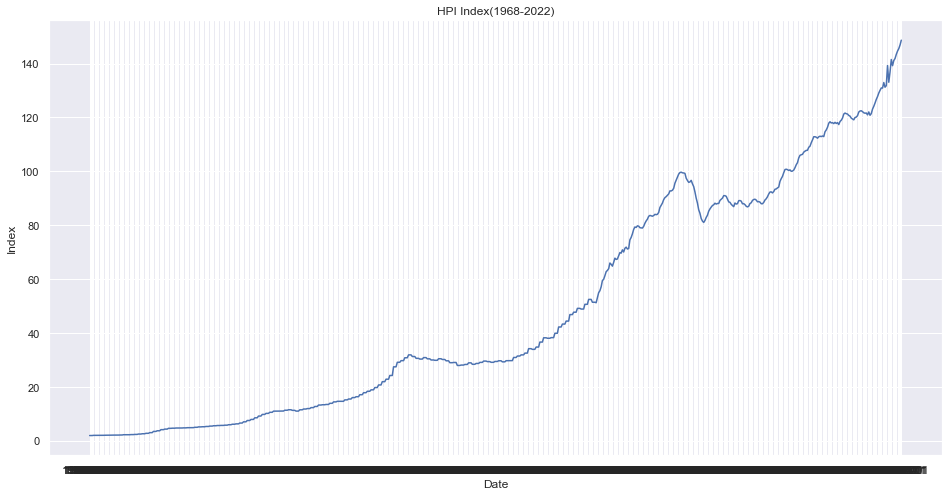

In [8]:
#plotting the data series

sns.set(rc={'figure.figsize':(16,8)})
sns.lineplot(data=df , x='Date',y='Index')
plt.title("HPI Index(1968-2022)")

In [9]:
#only saving the index values of HPI
df =df['Index']

In [10]:
#viewing the values
df

9           1.885299
19          1.885299
29          1.885299
39          1.949207
49          1.949207
             ...    
135249    143.422582
135670    144.646684
136091    145.556596
136512    146.898652
136933    148.688246
Name: Index, Length: 650, dtype: float64

In [11]:
#scaling down the magnitude of index
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
#checking the shape
df.shape

(650, 1)

In [13]:
#splitting dataset into train and test split
size =int(len(df)*0.65)
test_size =len(df)-size
train_data,test_data = df[0:size,:],df[size:len(df),:]

In [14]:
#checking length of train and test data
print("length of training data", len(train_data))
print("length of test data", len(test_data))

length of training data 422
length of test data 228


In [15]:
# create a function for dataset matrix
def mat_data(data, step=1):
    X = []
    Y = []
    for i in range(len(data)-step-1):
        a = data[i:(i+step), 0]    
        X.append(a)
        Y.append(data[i + step, 0])
    return np.array(X), np.array(Y)

In [16]:
#diving the train and test data into time step of 30
time_step = 30
X_train, y_train = mat_data(train_data, time_step)
X_test, y_test = mat_data(test_data, time_step)

In [19]:
#checking the shape of train and test data
print('Shape of X train',X_train.shape)
print('Shape of X test',X_test.shape)
print('Shape of y train',y_train.shape)
print('Shape of y test',y_test.shape)

Shape of X train (391, 30)
Shape of X test (197, 30)
Shape of y train (391,)
Shape of y test (197,)


In [20]:
#reshape the dataset for model building
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
#LSTM model building
model_LSTM=Sequential()
model_LSTM.add(LSTM(64,return_sequences=True,input_shape=(30,1)))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(32))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
#checking the model summary
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [23]:
#fitting the model
model_LSTM.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 222ms/step - loss: 0.0099 - val_loss: 0.0091
Epoch 2/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0029 - val_loss: 0.0489
Epoch 3/100
7/7 [==============================] - 0s 34ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 4/100
7/7 [==============================] - 0s 43ms/step - loss: 3.8975e-04 - val_loss: 0.0037
Epoch 5/100
7/7 [==============================] - 0s 40ms/step - loss: 2.7153e-04 - val_loss: 0.0012
Epoch 6/100
7/7 [==============================] - 0s 33ms/step - loss: 2.3217e-04 - val_loss: 0.0031
Epoch 7/100
7/7 [==============================] - 0s 42ms/step - loss: 1.7399e-04 - val_loss: 0.0011
Epoch 8/100
7/7 [==============================] - 0s 45ms/step - loss: 1.6783e-04 - val_loss: 0.0010
Epoch 9/100
7/7 [==============================] - 0s 44ms/step - loss: 1.4510e-04 - val_loss: 0.0012
Epoch 10/100
7/7 [==============================] - 0s 43ms/step - loss: 1.2250e-04 - val_los

In [24]:
#model prediction
train_predict=model_LSTM.predict(X_train)
test_predict=model_LSTM.predict(X_test)

In [25]:
##Transferring the values  to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
#calculating the error rate for training data
math.sqrt(mean_squared_error(y_train,train_predict))

25.939924258292628

In [27]:
#calculating the error rate of test data
math.sqrt(mean_squared_error(y_test,test_predict))

111.69119964458207

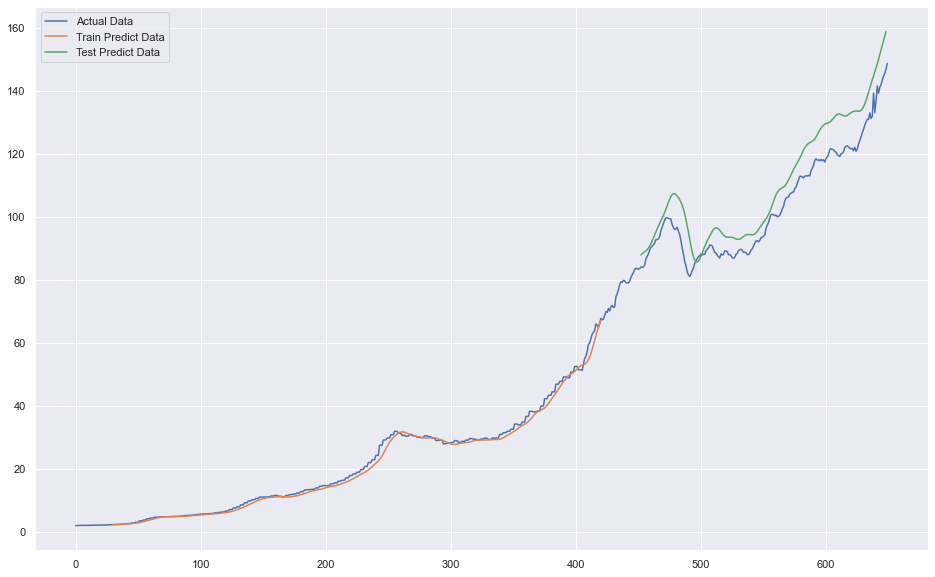

In [28]:
#plotting the train and test data with predicted data

look_back=30
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,10))
plt.plot(scaler.inverse_transform(df), label ='Actual Data')
plt.plot(trainPredictPlot, label='Train Predict Data')
plt.plot(testPredictPlot,label='Test Predict Data')
plt.legend()
plt.show()

In [29]:
#checking the length of test data
len(test_data)

228

In [30]:
#picking the last 30 data items from test data to predict next
x_input=test_data[198:].reshape(1,-1)
x_input.shape

(1, 30)

In [31]:
#creating a temporary list 
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
#creating a loop which predicts the next 10 months 
lst_output=[]
n_steps=30
i=0
while(i<10):
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} Month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_LSTM.predict(x_input, verbose=0)
        print("{} Month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_LSTM.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.089747]
31
1 Month input [0.8158052  0.81105029 0.8184629  0.81000977 0.81426109 0.82567772
 0.83276479 0.84102041 0.85010828 0.8573754  0.86626959 0.87312353
 0.87921897 0.87884944 0.89285238 0.88107928 0.88492283 0.9359855
 0.89360627 0.91972175 0.95113835 0.93553713 0.94848795 0.95370845
 0.96413108 0.97246947 0.97866766 0.98780955 1.         1.08974695]
1 Month output [[1.1073952]]
2 Month input [0.81105029 0.8184629  0.81000977 0.81426109 0.82567772 0.83276479
 0.84102041 0.85010828 0.8573754  0.86626959 0.87312353 0.87921897
 0.87884944 0.89285238 0.88107928 0.88492283 0.9359855  0.89360627
 0.91972175 0.95113835 0.93553713 0.94848795 0.95370845 0.96413108
 0.97246947 0.97866766 0.98780955 1.         1.08974695 1.10739517]
2 Month output [[1.1301506]]
3 Month input [0.8184629  0.81000977 0.81426109 0.82567772 0.83276479 0.84102041
 0.85010828 0.8573754  0.86626959 0.87312353 0.87921897 0.87884944
 0.89285238 0.88107928 0.88492283 0.9359855  0.89360627 0.91972175
 0.95113835 0.

In [33]:
#creating variables for evenly ranged values
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

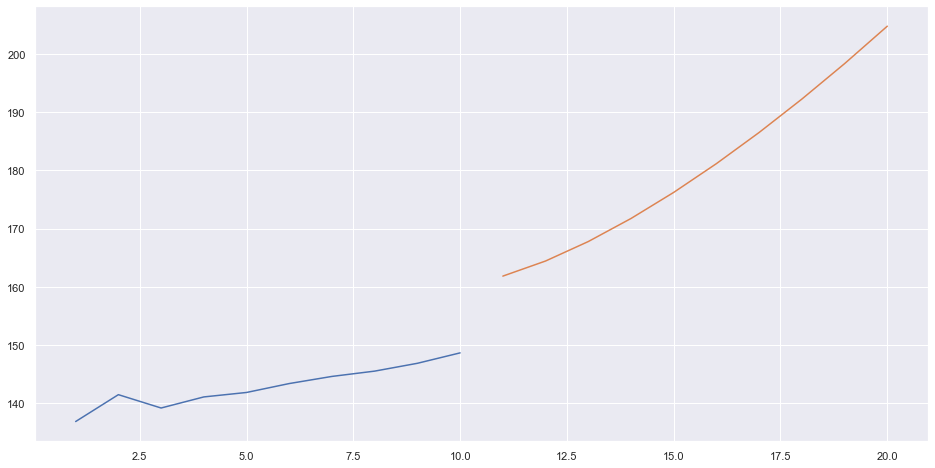

In [34]:
plt.plot(day_new,scaler.inverse_transform(df[640:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

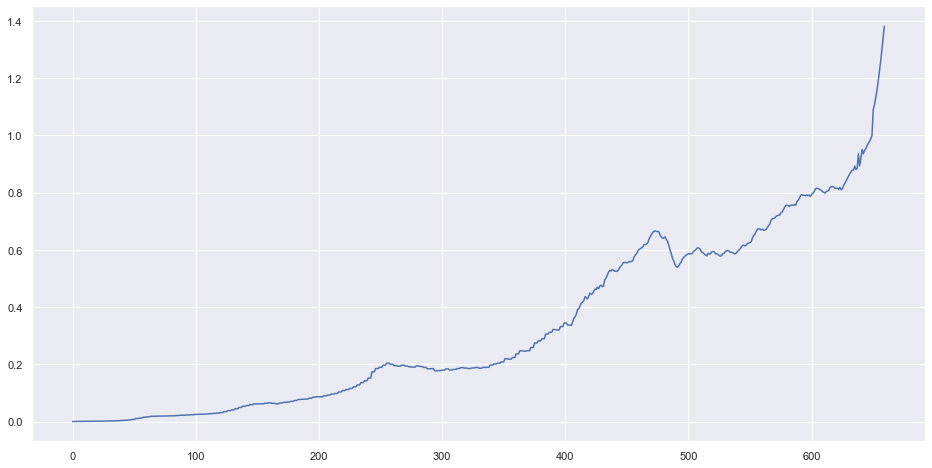

In [35]:
#adding the predicted values to the previous ones and plotting it
df_ex=df.tolist()
df_ex.extend(lst_output)
plt.plot(df_ex[:680])

In [36]:
#transforming the data
df_ex=scaler.inverse_transform(df_ex).tolist()

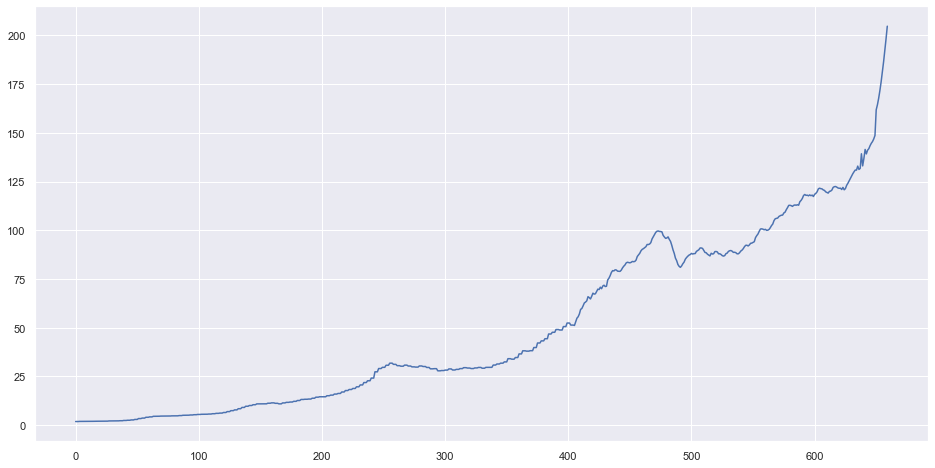

In [37]:
#plotting the total 
plt.plot(df_ex)

In [ ]:
#save model
model_LSTM.save("C:\Users\hp\dissertation\Model\HPI_model.H5")